In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set .csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Malignant
Begnin

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# df.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
df.drop(['Unnamed: 32','id'], axis=1, inplace=True)

In [9]:
m_df=df[df['diagnosis']=='M']

In [10]:
# sns.pairplot(m_df)

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
x=df.drop('diagnosis', axis=1)
y=df['diagnosis']

stratification used to make sure that a fair split is done from each class/ each class is split with the same percentage 

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain,ytest=train_test_split(x, y , test_size=0.2, random_state=52, stratify=y)

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
scaler=MinMaxScaler()
# scaler=StandardScaler()

In [16]:
x_train_scaled=scaler.fit_transform(xtrain)
x_test_scaled=scaler.transform(xtest)

In [17]:
xtrain.shape, xtest.shape, ytrain.shape,ytest.shape

((455, 30), (114, 30), (455,), (114,))

In [50]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report

In [51]:
LR_model=LogisticRegressionCV(random_state=100, penalty='l2', max_iter=30)
LR_model.fit(xtrain,ytrain)
y_pred=LR_model.predict(xtest)
accuracy_score(y_pred, ytest)

0.9736842105263158

In [52]:
LR_model.predict_proba(xtest).round(2)

array([[0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.71, 0.29],
       [0.62, 0.38],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.27, 0.73],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.46, 0.54],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.27, 0.73],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.83, 0.17],
       [0.  , 1.  ],
       [0.61, 0.39],
       [0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.45, 0.55],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  ,

In [53]:
LR_model.coef_

array([[-2.34296347e+00, -1.79963873e-01,  1.99130683e-01,
        -2.91806845e-03,  1.28112555e-01,  4.07839426e-01,
         6.74522274e-01,  3.22519127e-01,  2.02623817e-01,
         2.09323122e-02, -9.52826994e-02, -1.75452416e+00,
        -6.58426877e-01,  1.57743303e-01,  1.84971556e-02,
         2.72470712e-02,  9.66784561e-02,  4.51198936e-02,
         3.54100533e-02, -2.06346376e-03, -1.99344307e+00,
         4.23814250e-01,  1.56028640e-01,  2.74333877e-02,
         2.63090351e-01,  1.21804624e+00,  1.75910424e+00,
         6.44296950e-01,  5.70667755e-01,  1.10554628e-01]])

In [105]:
LR_model.feature_names_in_

AttributeError: 'LogisticRegressionCV' object has no attribute 'feature_names_in_'

In [104]:
pd.DataFrame(LR_model.coef_, columns=LR_model.feature_names_in_).T

AttributeError: 'LogisticRegressionCV' object has no attribute 'feature_names_in_'

In [30]:
LR_model2=LogisticRegression(random_state=3)
LR_model2.fit(x_train_scaled,ytrain)
y_pred_scaled=LR_model2.predict(x_test_scaled)
accuracy_score(y_pred_scaled, ytest)

0.9824561403508771

In [106]:
 pd.DataFrame({'ypred':ypred, 'ytest':ytest})

NameError: name 'ypred' is not defined

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score

In [74]:
#accuracy score

accuracy_score(ytest , y_pred_scaled)

0.9824561403508771

In [75]:
#precision score

precision_score(ytest , y_pred_scaled, pos_label='M')

0.9761904761904762

In [76]:
#precision score

precision_score(ytest , y_pred_scaled, pos_label='B')

0.9861111111111112

In [77]:
#recall score

recall_score(ytest , y_pred_scaled, pos_label='B')

0.9861111111111112

In [78]:
#recall score

recall_score(ytest , y_pred_scaled, pos_label='M')

0.9761904761904762

In [79]:
#f1score score

f1_score(ytest , y_pred_scaled, pos_label='M')

0.9761904761904762

In [80]:
#f1score score

f1_score(ytest , y_pred_scaled, pos_label='M')

0.9761904761904762

In [81]:
import matplotlib.pyplot as plt

In [82]:
print(classification_report(ytest , y_pred_scaled))

              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [83]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [84]:
print(confusion_matrix(ytest, y_pred_scaled))

[[71  1]
 [ 1 41]]


In [85]:
cc=confusion_matrix(ytest, y_pred_scaled)
print(cc)

[[71  1]
 [ 1 41]]


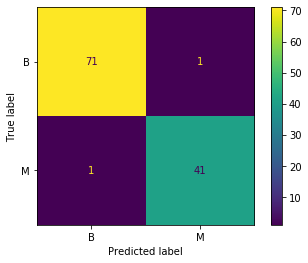

In [86]:
ConfusionMatrixDisplay(cc, display_labels=LR_model2.classes_).plot()

In [87]:
print(confusion_matrix(ytest, y_pred_scaled))

[[71  1]
 [ 1 41]]


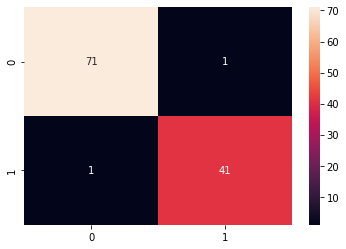

In [88]:
import seaborn as sns
sns.heatmap(cc, annot=True)

In [89]:
from sklearn.metrics import roc_auc_score

In [90]:
y_pred_scaled

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M'], dtype=object)

In [91]:
ytest

470    B
98     B
284    B
311    B
3      M
      ..
32     M
140    B
443    B
521    M
536    M
Name: diagnosis, Length: 114, dtype: object

In [102]:
y_propa=LR_model2.predict_proba(x_test_scaled).round(2)[:,1]

In [103]:
roc_auc_score(ytest,y_propa)

0.9993386243386243

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
accuracylist=[]
for i in range(1,15):
    night=KNeighborsClassifier(n_neighbors=i)
    night.fit(x_train_scaled,ytrain)
    y_pred0=night.predict(x_test_scaled) 
    
    accuracylist.append(accuracy_score(y_pred0,ytest))

    
    

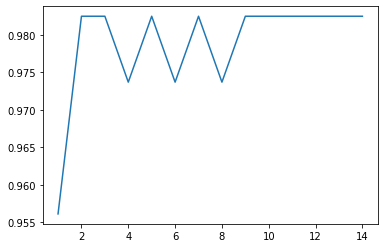

In [178]:
plt.plot(range(1,15),accuracylist)

In [177]:
accuracylist

[0.956140350877193,
 0.9824561403508771,
 0.9824561403508771,
 0.9736842105263158,
 0.9824561403508771,
 0.9736842105263158,
 0.9824561403508771,
 0.9736842105263158,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771]

In [166]:
night=KNeighborsClassifier(n_neighbors=10)

In [167]:
night.fit(x_train_scaled,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [168]:
y_pred0=night.predict(x_test_scaled)

In [169]:
print(accuracy_score(y_pred0,ytest))

0.9824561403508771


In [161]:
night.score(x_train_scaled,ytrain)

0.9714285714285714

In [162]:
night.fit(x_test_scaled,ytest)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [163]:
night.score(x_test_scaled,ytest)

0.9649122807017544